# Chapter 9: Hypothesis Testing

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import random
import matplotlib.pyplot as plt

%matplotlib inline

## "Classical Hypothesis Testing"

**Hypothesis Testing**: the process of determining whether an *apparent effect* is statistically significant.
  * a framework determining whether `observed` data deviates from what is `expected`.

http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-24.html

### Populations & Samples
##### Statistically Infer about a Population from a Sample
In statistical analysis of data, a few selected **samples** are used to draw conclusions about the population (*from which these samples were taken from*). Correct study design ensures that the *sample data* are **representative** of the population.
  * **Population**: includes all of the elements from a set fo data.
  * **Sample**: consists of 1<sup>+</sup> observations from the population.
  
**Sampling Distribution**: probability distribution of a given statistic based on a random sample.  
**Statistical Inference**: enables an educated guess about a population parameter based on a statistic computed from a sample randomly drawn from that population.  

| | Population Parameter | Sample Statistic|
|:--|:--:|:--:|
|Mean|μ|x̄|
|Standard Deviation|σ|*s*|

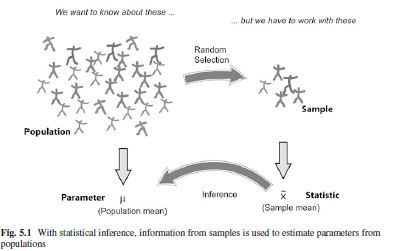

In [2]:
from IPython.display import Image, display
import platform

if platform.system()=='Linux':
    display(Image(filename='/media/cpnguyen/Windows8_OS/Users/Calvin/Desktop/HS 699/code/hyptest.JPG'))
if platform.system()=='Windows':
    display(Image(filename='C:\Users\Calvin\Desktop\HS 699\code\hyptest.jpg'))

## Confidence Interval
**Confidence Intervals** are a range of values defined so that there's a specified probability that the value of a parameter lies within in.

A **95%** confidence interval is interpreted as: "*If the population from which the sample drawn was sampled 100 times, approximately **95 of those confidence intervals** would contain the "true" coefficient*".

http://adventuresinpython.blogspot.com/2012/12/confidence-intervals-in-python.html

Methods:
  1. SciPy Package
  2. statsmodels method

#### SciPy Package (`scipy.stats.norm.interval()`)
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
`scipy.stats.norm.interval(alpha, loc=0, scale=1)` 

Parameters:
  * **alpha**: CI endpoints (%)
  * loc = estimate seq's mean
  * scale = estimate seq's std
    * `scale = std / √n`
       * std = σ (population) or *s* (sample)  

#### statsmodels Package (`.conf_int()`)
`smf.ols.conf_int()`

### Step 1: Exploratory Data Analysis
Exploratory analyses of the data reveals several "apparent effects" such as the differences between `First` & `Others` babies. Such analyses take these effects at face value. It does not prove whether the effect reflects a *real difference* or appeared in the `sample` by chance.
  * Example: EDA revealed a difference in **mean pregnancy length** for `first` & `others` babies. Does this reflect a real difference for women in the U.S. (larger population) or appeared in the sample by chance.

#### Fundamental Question
*Fundamental Question*: whether the effects we see in `sample` are likely to appear in the `larger population`.

**Solution**: several ways to formulate this quesiton
  * Fisher Null Hypothesis Testing
  * Neyman-Pearson Decision Theory
  * Bayesian Inference

### Step 2: Hypothesis Testing
**Goal**: answer the question "*Given a sample and an apparent effect, what's the probability of seeing such an effect by chance?*"

**Solution** to answer the question:
  1. Quantify the size of the *apparent effect* by choosing a **test statistic**.
    * NSFG: apparent effect is a difference in *pregnancy length* between `Firsts` & `Others babies. Natural choice for the test statistic is the *difference in means between the 2 groups*.
  2. Define a **null hypothesis** (H<sub>0</sub>).
    * **Null Hypothesis**: which is a model of the system based on the assumption that the apparent effect is not real.
      * There is a *lack of difference* between the groups.  
    * Hypotheses
      * **H<sub>0</sub>**: The sample mean `<var>` points to the population mean, where μ=x̄<sub>var</sub>
      * **Alternative Hypothesis (H<sub>A</sub>)**: The sample mean `<var>` does not point to the population mean, where μ≠x̄<sub>var</sub>.
    * NSFG: Null hypothesis is that there is *no difference between first babies and others*. That is, that *pregnancy lengths* for both groups have the same distribution.
  3. Compute a **p-value**
    * **p-value**: a probability of seeing the apparent effect *if the **null hypothesis** is true*.
    * NSFG: compute the actual difference in means, then  compute the probability of seeing a difference as big,  or bigger, under the null hypothesis.
  4. Interpret the Result. (*Use computed value to accept/reject null hypothesis*).
     * Determine **statistical significance**
       * an effect is statistically significant if it's unlikely to occur by chance.

#### Test Statistics
**Research Question**: *Is the observed mean (`sample`) different from the hypothesized mean (`population`) relative to the variability of the data?*  
http://www.statisticshowto.com/when-to-use-a-t-score-vs-z-score/

***Z-score (standard score)***  
A Z-score is the *number of standard deviations from the mean* a **data point** is.
  * It tells you how many *standard deviations* from the mean, the result is.

`z = (x̄ - μ) / (σ /√n)`

Used when you ***know the population standard deviation and mean***.

***t-score***

Similar to *z-scores*, it is a conversion of individual scores into a *standard form*.   
**T-scores** are used when you ***don't know the population standard deviation***.

`T = (x̄ - μ) / (s /√n)`

**Note**: For large samples (n > 30), the **t-score** == **z-score**.

#### p-value
The probability that an effect could occur by chance. 
  * **p-value ≤ 0.05** (small p-value): the effect is considered *significant*. P-value indicates strong evidence  against the H<sub>0</sub>.
    * Reject H<sub>0</sub>. There is a statistically significant difference.
    * If the **p-value** is low, the effect is said to be **statistically significant**. Meaning that it's unlikely to have occurred by chance. Thus, we infer that the effect is more likely to appear in the larger population.
  * **p-value > 0.10** (large p-value): the effect can plausibly be explained by chance. P-value indicates weak evidence against the H<sub>0</sub>, thus failing to reject it.
    * Accept H<sub>0</sub>. No significant difference and the sample mean is indicative of the population.
  * **0.05 < p-value < 0.10**: borderline. Data does not provide strong evidence for conclusions.
    * P-value is marginal.


**Note**: arbitrary threshold (5%) depends on choice of the test statistics & model of null hypothesis. P-values should not be considered precise measurements.

#### Logic
Logic behind this process is similar to *proof by contradiction*. To prove a mathematical statement, `A`, you assume temporarily that `A` is false.
  * If that assumption leads to a contradiction, you conclude that `A` must actually be true.

Similarly, to test a hypothesis  (e.g. "The effect is real"), we assume, *temporarily*, that it is not (**null hypothesis**).
  * Based on that assumption, we compute the probability of the apparent effect *due to chance* (**p-value**)
    * If **p-value** is low: conclude that **null hypothesis** is *unlikely* to be true.
    
### Types of Tailed Tests
##### Two-tailed Test
A test that asks: *"What is the chance of an effect as big as the observed effect, **positive or negative**?"*
  1. One-Sample Hypothesis Test
  2. Two-Sample Hypothesis Test

##### One-tailed Test
A test that asks: *"What is the chance of an effect as big as the observed effect, and **with the same sign**?"*
  * only counts 1 side of the distribution of differences.

A more specific test, hence a stronger hypothesis. In general, the **p-value** for a one-sided test is ~ half of the p-value for two-sided test depending on the shape of the distribution.
p-value<sub>1-sided</sub> = 0.5 * p-value<sub>2-sided</sub>

## Two-Tailed Test
Two-tailed test tests for the possibility of the relationship in **both** directions, *regardless of the direction of the relationship hypothesized.*

**α**: significance level (α=0.05)
  * two-tailed tests allot half of α to *both* directions (0.025 in each).

#### Null Hypothesis
**H<sub>0</sub>**: The mean is equal to any given value of `x`.
   * test **both**:
      * if the mean is *significantly greater* than `x`
      * if the mean is *significantly less* than `x`

#### p-value
**p-value < 0.05**: the mean is considered significantly different from `x` if the **test-statistic** is in the *top 2.5%* or *bottom 2.5%* of its probability distribution.

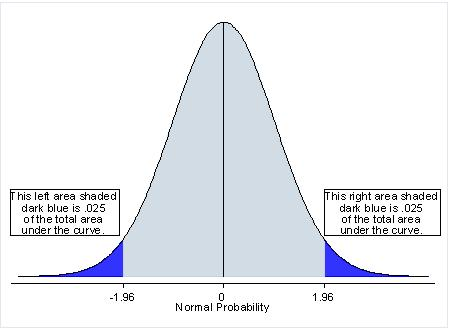

In [3]:
if platform.system()=='Linux':
    display(Image(filename='/media/cpnguyen/Windows8_OS/Users/Calvin/Desktop/HS 699/code/p2tail.jpg'))
if platform.system()=='Windows':
    display(Image(filename='C:\Users\Calvin\Desktop\HS 699\code\p2tail.jpg'))

## One-Sample Hypothesis Test
**Purpose**: used to detect a difference between a (*single*) sample mean (x̄) & a known population value (μ).

*Assumptions*:
  * Normal population distribution
  * Observations are independent (1 obs doesn't affect others)

Test of Interest: *Is our observed sample mean (x̄) different than what we would expect under the null mean (μ)?*

### Example: Coin Toss
http://ipython-books.github.io/featured-07/

Flip a coin `n` times and observe `h` (140) heads & `t` (110) tails. We want to know whether the coin is fair (H<sub>0</sub>).

#### Bernoulli Distribution (`B(q)`)
A special case of the **binomial distribution**. The probability distribution of a random variable that takes the value `1` with *success probability* of `p` & value `0` with *failure probability* of `q=1-p`.

`B(q)` is used to denote the Bernoulli distribution with unknown parameter `q` (population mean `μ=q`) and variance (`σ2 = q(1−q)`). A Bernoulli variable is:
  * **0** (*tail*) with probability `1-q`
  * **1** (*head*) with probability `q`
  
#### Conduct One-Sample Z-Test
##### Method 1: Manual
1) Hypotheses
   * **H<sub>0</sub>**: The coin is fair (`q = 0.5`). Just bad luck if we obtained these values.
     * The sample mean points to the population, where μ=x̄<sub>coin flip</sub>.
   * **H<sub>A</sub>**: The coin is not fair (`q != 0.5`).
     * * The sample mean does not point to the population, where μ=x̄<sub>coin flip</sub>.
     * There is a *statistically significant difference*.

In [4]:
n = 250 # num of coin flips
h = 140 # num of heads
q = 0.5 # null hypothesis (fair coin)

2) Compute **z-score** & **p-value**.  
`z = (x̄ - q) * √(n / (q(1-q)) )`

In [5]:
xbar = float(h)/n # sample 
z = (xbar - q) * np.sqrt(n / (q*(1-q))) # z-score
z

1.8973665961010293

x-bar (x̄) is the *estimated* average of the distribution (sample mean), which was found to be 1.89.

In [6]:
pval = 2 * (1 - stats.norm.cdf(z))
pval

0.057779571123596885

The p-value is 0.06

3) Interpret the Results (test statistics).  
**p-value** is > 0.05. Thus we *fail to reject* the null hypothesis (H<sub>0</sub>) and conclude that the coin is fair and the sample mean points to that of the population.  

The difference is most likely due to bad luck and is *not* statistically significant. It should be noted that the results are borderline. Thus, the data does not provide strong evidence that the coin is biased or not.

If the coin is fair, we expect to see a difference as big as 30 (140 heads - 110 tails) about 6% of the time (chance).

##### Method 2: SciPy Package (scipy.stats.ttest_1samp)
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

`scipy.stats.ttest_1samp(sample_obs, pop_mean)`
Parameters:
  * sample observation
  * population mean (expected value in null hypothesis)

Returns:
  * **t-statistic**
  * **p-value**

In [7]:
coin_samp = [0] * 110 + [1] * 140
coin_z, coin_p = stats.ttest_1samp(coin_samp, 0.5)
print "Z-score = %.2f" % coin_z
print "p-value = %.2f" % coin_p

Z-score = 1.91
p-value = 0.06


## Two-Sample Hypothesis Test
**Purpose**: To compare 2 independent samples (control vs. treatment groups) to see what extent these samples come from a population with the same mean(μ<sub>1</sub> & μ<sub>2</sub>).  
  * `Predictor variable` is dichotomous: either you're in a group or not (independent samples). 
  * `Outcome variable` is continuous

Essentially, it compares 2 samples and explores the possibility of dealing with 2 *different* population distributions or not.
  * Test if there's a *difference in mean* between the 2 groups.

### Hypotheses
1. **H<sub>0</sub>**: The means of both study samples point to the same population, where μ<sub>1</sub> = μ<sub>2</sub>.
  * Both samples have equal average/means.
2. **H<sub>A</sub>**: The means of both study samples do not point to the same population, where μ<sub>1</sub> ≠ μ<sub>2</sub>.

### Conduct Two-Sample Hypothesis Test
##### Method: SciPy Package (scipy.stats.ttest_ind)
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html


`scipy.stats.ttest_ind(sample_a, sample_b, equal_var=True)`  
Parameters:
  * sample a array
  * sample b array
  * equal_var: if True, perform standard independent 2 sample test asumming equal population variances.
Returns:
  * **t-statistic**
  * **p-value**

### Example: NSFG Pregnancy Length (`Firsts` vs. `Others`)
EDA revealed that `firsts` babies have slight longer means of `prglngth` than `others`. 

**Research Question**: Are these effects (*difference in pregnancy lengths means*) statistically significant?

1) Hypotheses
   * **H<sub>0</sub>**: The means of both study samples point to the same population, where μ<sub>firsts</sub> = μ<sub>others</sub>.
   * **H<sub>A</sub>**: The means of both study samples do not point to the same population, where μ<sub>firsts</sub> ≠ μ<sub>others</sub>.
   
Note: The samples are `firsts` & `others` babies; we're trying to determine if they're indicative of the greater U.S. population.

In [8]:
import nsfg
preg = nsfg.ReadFemPreg() # DataFrame
live = preg[preg.outcome==1] # filter for live births
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

# Series for prglngth
firsts_prglngth = firsts['prglngth']
others_prglngth = others['prglngth']
print "Firsts Mean = %.2f weeks" % firsts_prglngth.mean()
print "Others Mean = %.2f weeks" % others_prglngth.mean()
print "Mean Difference = %.2f weeks" % abs(firsts_prglngth.mean() - others_prglngth.mean())

Firsts Mean = 38.60 weeks
Others Mean = 38.52 weeks
Mean Difference = 0.08 weeks


2) Compute the **z-score** & **p-value**.

In [9]:
prglngth_z, prglngth_p = stats.ttest_ind(firsts_prglngth, others_prglngth)
print "The z-score is %.2f and p-value is %.2f" % (prglngth_z, prglngth_p)

The z-score is 1.38 and p-value is 0.17


3) Analyze the results.  
p-value is > 0.05. Thus we *cannot reject* the null hypothesis
(H<sub>0</sub>) and conclude that the means of both samples point to the same population. The effect (**difference in pregnancy length**) is *not* statistically significant.

We'd expect to see a difference as big as the observed effect about 17% of the time. Observed effect difference is due to chance.

### Example: NSFG Birthweight (`Firsts` vs. `Others`)
EDA revealed that `firsts` babies have slight lower means of `birthwgt_lb` than `others`. 

**Research Question**: Are these effects (*difference in birth weight means*) statistically significant?  

1) Hypotheses
   * **H<sub>0</sub>**: The means of both study samples point to the same population, where μ<sub>firsts</sub> = μ<sub>others</sub>.
   * **H<sub>A</sub>**: The means of both study samples do not point to the same population, where μ<sub>firsts</sub> ≠ μ<sub>others</sub>.

In [10]:
# Series for birthwgt_lb
firsts_wgt = firsts['birthwgt_lb']
others_wgt = others['birthwgt_lb']
# dropna() method == nan_policy='omit'
# firsts_wgt = firsts['birthwgt_lb'].dropna()
# others_wgt = others['birthwgt_lb'].dropna()
print "Firsts Mean = %.2f lbs" % firsts_wgt.mean()
print "Others Mean = %.2f lbs" % others_wgt.mean()
print "Mean Difference = %.2f lbs" % abs(firsts_wgt.mean() - 
                                      others_wgt.mean())

Firsts Mean = 6.75 lbs
Others Mean = 6.91 lbs
Mean Difference = 0.15 lbs


2) Compute the **z-score** & **p-value**.

In [11]:
wgt_z, wgt_p = stats.ttest_ind(firsts_wgt, others_wgt, nan_policy='omit')
print "The z-score is %.2f and p-value is %.2f" % (wgt_z, wgt_p)

The z-score is -5.16 and p-value is 0.00


3) Analyze the results.  
p-value is ≤ 0.05 (*low*). Thus we *reject* the null hypothesis (H<sub>0</sub>) and conclude that the means of both samples *do not* point to the same population. 

The effect (**difference in birth weight means**) is statistically significant.


## Paired Comparisons Test (Paired t-test)
**Purpose**: Compare 2 sets of **repeated measures** (same parameters) on the *same subjects/sample* at different times or under different conditions
  * Hypothesis test on data from *non-independent* samples
  * *Same* subjects who have a factor measured *before* & *after* treatment
  * **Variable of interest**: difference between individual pairs (repeat sampling)

#### Equation:
`t = (sample mean diff - population mean diff) / (σ/√n)`
  * sample standard deviation: *s*<sub>d</sub> = σ/√n

Example:
 * Difference in weight of 9 people recorded *before* & *after* an abdominal surgery. Determine if surgery leads to a change in weight.
 * Difference in systolic BP among participants *prior to* & *upon completion* of an exercise program.

### Method: SciPy Package (`scipy.stats.ttest_rel`)
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html
`scipy.stats.ttest_rel(a, b, axis=0)`  
Parameters:
  * `a`: array of sample a
  * `b`: array of sample b  

Returns:
  * t-statistic
  * two-tailed p-value

#### Example: Weight Pre- & Post- Abdominal Surgery
Measured weight of 9 people (sample) before surgery and 5 months post surgery.

1) Hypotheses
  * H<sub>0</sub> : The population mean change from before & after the surgery is 0 or positive, so μ<sub>d</sub> ≥ 0.
  * H<sub>A</sub> : The population mean change from before & after the surgery is negative, so μ<sub>d</sub> < 0.
  

In [12]:
baseline = [67.2, 67.4, 71.5, 77.6, 86.0, 89.1, 59.5, 81.9, 105.5]
follow_up = [62.4, 64.6, 70.4, 62.6, 80.1, 73.2, 58.2, 71.0, 101.0]

print "Baseline Weight Mean = %.2f" % np.mean(baseline)
print "Follow-up Weight Mean = %.2f" % np.mean(follow_up)
print "Mean Difference = %.2f" % (np.mean(baseline) - np.mean(follow_up))

Baseline Weight Mean = 78.41
Follow-up Weight Mean = 71.50
Mean Difference = 6.91


2) Compute **z-score** & **p-value**.

In [13]:
pair_z, pair_p = stats.ttest_rel(baseline, follow_up)
print "The t-statistic is %.2f and the p-value is %.2f." % (pair_z, pair_p)

The t-statistic is 3.67 and the p-value is 0.01.


3) Analyze the Results.

The **p-value** is small, indicating strong evidence against the null hypothesis. Thus, H<sub>0</sub> is *rejected* in favor of the H<sub>A</sub>. 

The difference in mean of the sample is statistically significant. Hence, the change in weight is significantly affected by the surgery.

## One-Tailed Test
One-tailed test tests for the possibility of the relationship in **one** direction, *disregarding the possibility of a relationship in the other direction.* By testing a *more specific* hypothesis, this provides **more power to detect an effect in 1 direction**.
  * only counts for 1 side of the distribution

**α**: significance level (α=0.05)
  * one-tailed tests allot α to one direction of interest.

#### Null Hypothesis
**H<sub>0</sub>**: The mean is equal to any given value of `x`.
   * test **either** (choose a tail):
      1. if the mean is *significantly greater* than `x`
      2. if the mean is *significantly less* than `x`  
      
Alternative hypotheses of one-tailed tests are more specific, hence smaller p-value.
**Example**: NSFG Pregnancy Lengths
  * **One-tail tests**: `Firsts` babies are more likely to be born late (one-direction)
  * **Two-tail tests**: `Firsts` babies are more likely to be born late or early (both directions)

#### p-value
1. Top-Tail (mean is significantly greater than x)
**p-value < 0.05**: the mean is considered significantly different from `x` if the **test-statistic** is in the *top 5%* of its probability distribution.

  * Reject **H<sub>0</sub>** if:
    * z-score > 0
    * p-value<sub>two-tail</sub>/2 < 0.05

2. Bottom-Tail (mean is significantly less than x)
**p-value < 0.05**: the mean is considered significantly different from `x` if the **test-statistic** is in the *bttom 5%* of its probability distribution.

  * Reject **H<sub>0</sub>** if:
    * z-score < 0
    * p-value<sub>two-tail</sub>/2 < 0.05


p-values are usually half of that of its corresponding two-tail tests of a normal distribution.

### When is a One-tail Test Appropriate?
After considering and concluding that the **consequences of missing an effect in the *untested direction* is negligible**, you may apply the test to have *more power* to detect an effect in a specific direction.

**Benefit**: Maximize ability to detect the improvement/effect..

##### Example Case Uses
  * **Appropriate**: Developed a new drug that is *cheaper* than the existing drug and is *no less effective*. A one-tail test is conducted to test if it's **less effective than the existing drug**. You don't care if it's significantly more effective. 
  * **Inappropriate**: Developed a new drug that is believed to be an improvement over an existing drug. A one-tail test *maximizes the ability to detect the **improvement** of the drug*. Doing so, you fail to test for the possibility that the new drug is less effective (extreme consequences).

It's also **inappropriate** to run a **one-tail test** after running a **two-tail test *that failed*** to reject the H<sub>0</sub>. Using statistical tests inappropriately leads to invalid results that are not replicable.

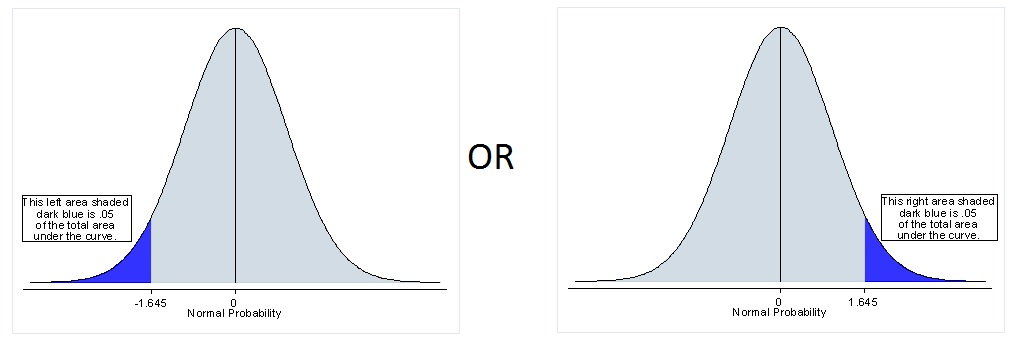

In [14]:
if platform.system()=='Linux':
    display(Image(filename='/media/cpnguyen/Windows8_OS/Users/Calvin/Desktop/HS 699/code/p1tail.jpg'))
if platform.system()=='Windows':
    display(Image(filename='C:\Users\Calvin\Desktop\HS 699\code\p1tail.jpg'))

### Example: NSFG *Later* Pregnancy Lengths (`Firsts` vs. `Others`)
**Research Question**: Is the effect (later pregnancy lengths of `firsts` babies) statistically significant?

1) Hypotheses
   * **H<sub>0</sub>**: The means of both study samples point to the same population, where μ<sub>firsts</sub> = μ<sub>others</sub>.
   * **H<sub>A</sub>**: The means of both study samples do not point to the same population, where μ<sub>firsts</sub> ≠ μ<sub>others</sub>.

In [15]:
firsts_prglngth = firsts['prglngth']
others_prglngth = others['prglngth']
print "Firsts Mean = %.2f weeks" % firsts_prglngth.mean()
print "Others Mean = %.2f weeks" % others_prglngth.mean()
print "Mean Difference = %.2f weeks" % abs(firsts_prglngth.mean() - others_prglngth.mean())

Firsts Mean = 38.60 weeks
Others Mean = 38.52 weeks
Mean Difference = 0.08 weeks


2) Compute the **z-score** & **p-value**.

In [16]:
prglngth_z, prglngth_p = stats.ttest_ind(firsts_prglngth, others_prglngth)
print "The z-score is %.2f and p-value is %.2f" % (prglngth_z, prglngth_p/2.0)

The z-score is 1.38 and p-value is 0.08


3) Analyze the Results.  
  * **t-statistic (3.67) > 0**
  * **p-value (0.08) ≥  0.05**  

With a *relatively high* (borderline) p-value, the H<sub>0</sub> *cannot be rejected*. The difference is *not* statistically significant. Hence, `firsts` babies with longer pregnancy lengths point to the same population as `others`.

# Hypothesis Testing: Correlation
Hypothesis testing framework can also test correlations.
  * **test statistic**: Correlation Coefficient (*Pearson*, *Spearman*, etc.)
  * **H<sub>0</sub>**: There is *no* correlation between the 2 variables.

If there's reason to expect a certain correlation (*negative* or *positive*), a **one-sided test** may be appropriate. Without such reason, a **two-sided test** is more appropriate (*absolute value* of correlation).

### Example: NSFG - Correlation between Birth Weight & Mother's Age
No reason to expect positive correlation exists. Thus, a **two-sided test** using the *absolute value* of the correlaiton is appropriate.


1) Hypotheses
  * **H<sub>0</sub>**: There is *no* correlation between the birth weight (`totalwgt_lb`) and mother's age (`agepreg`).
  * **H<sub>A</sub>**: There is correlation between the birth weight (`totalwgt_lb`) and mother's age (`agepreg`).

2.) Compute the **test-statistic** (Correlation Coefficient) & **p-value**)

##### Pearson Correlation

In [17]:
live.dropna(subset=['totalwgt_lb', 'agepreg']) # drop rows missing either variable
corr_p, corr_pval = stats.pearsonr(live['totalwgt_lb'], live['agepreg'])
print "The Pearson's Correlation Coefficient is %.2f and p-value is %.2f" % (corr_p, corr_pval)

The Pearson's Correlation Coefficient is nan and p-value is 1.00


C:\Users\Calvin\AppData\Local\Enthought\Canopy\User\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  t_squared = r**2 * (df / ((1.0 - r) * (1.0 + r)))
C:\Users\Calvin\AppData\Local\Enthought\Canopy\User\lib\site-packages\scipy\stats\stats.py:5084: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


##### Spearman (Rank-Order) Correlation

In [18]:
corr_s, corrs_pval = stats.spearmanr(live['totalwgt_lb'], live['agepreg'])
print "The Spearman Correlation Coefficient is %.2f and p-value is %.2f" % (corr_s, corrs_pval)

The Spearman Correlation Coefficient is 0.09 and p-value is 0.00


3) Analyze the Results.  
  * The correlation between `birth weight` & `age` is about 0.07 (Pearson's) and 0.09 (Spearman's). It seems as *older* mothers have *heavier* babies.
  * The ***low* p-value** (p < 0.05) provides strong evidence against H<sub>0</sub>. Thus, we reject it in favor of the alternative hypothesis (H<sub>A</sub>) and conclude that there is a correlation between birth weight & mother's age.
  * The effect (**positive correlation**) is statistically significant, *despite a small correlation value*.  

**Note**: This example is a reminder that "**statistical significance**" does not always mean that an effect is important/significant in practice. *It only means that it's unlikely to have occurred by chance*.

## Hypothesis Test: Proportions
### Approach 1: Test Statistic = *Total Deviation*
Apply hypothesis testing framework to testing proportions. The *objective* is to determine ifthe differences are *statistically significant* (happened by chance or not).  
  * **test statistic**: total absolute difference between `observed` outcomes and `expected` long-term averages.
  * **H<sub>0</sub>**: There is *no* difference in proportions.
  
**Proportions**: The *difference* between the `expected` and `observed` outcomes.  

Steps of Testing Proportions:
  1. Compute the `expected` frequency for each value
  2. Compute the **difference** between the `expected` and `observed` frequencies. 
  3. Compute the **total absolute difference**.

### StatsModels Package: `proportion.proportions_ztest`
http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.proportion.proportions_ztest.html  
`statsmodels.stats.proportions.proportions_ztest(count, nobs)`  
Parameters:
  * **count**: array of results
  * **nobs**: number of trials/observations

Results:
  * **test-statistic**
  * **p-value**

**Note**: Current bugs with version `6.x` raises a `TypeError: can't multiply sequence by non-int of type 'float'` for two-sample hypothesis tests.  

#### Example: Crooked Die (Cheating at a Casino)
You run a casino and suspect a customer is using a crooked die (modified to make one of the faces more likely than others). You confiscate the die, but now *must prove that it's crooked*. You roll it 60 times and get the following results:

|Value|Frequency|Deviation|
|:--:|:--:|:--:|
|1|8|-2|
|2|9|-1|
|3|19|9|
|4|5|-5|
|5|8|-2|
|6|11|1|

On average, you would expect each value to appear 10 times. Yet in this dataset the value `3` appears more often than expected and the value `4` appears less often. The **total absolute difference** (*sum of the deviations*) is 20.

**Research Question**: *Are these differences statistically significant*? How often would we see such difference by chance?

1) Hypotheses
  * **H<sub>0</sub>**: There is *no* difference between `expected` and `observed` outcomes. The die is fair.
  * **H<sub>A</sub>**: There is a difference between `expected` and `observed` outcomes. The die is *not* fair.

2.) Compute the **test-statistic** (sum of absolute differences) & **p-value**).

In [19]:
def die_teststat(observed):
    """Function calculates the test statistic (sum of the absolute differences) for 
    proportion of a die's outcome."""    
    n = sum(observed) # number of rolls
    expected = np.ones(6) * n/6.0 # expect frequencies of 10 for each side
    test_stat = sum(abs(observed-expected))
    return test_stat

In [20]:
die_results = {1:8, 2:9, 3:19, 4:5, 5:8, 6:11} # dictionary of side:freq
die_prop = die_teststat(die_results.values())
#z_test, pval_p = statsmodels.stats.proportion.proportions_ztest(die_results.values(), [60,60,60,60,60,60])
print "The test-statistic (sum of absolute differences) is %.2f" % die_prop

The test-statistic (sum of absolute differences) is 20.00


The p-value is 0.13.
Unable to compute using the `statsmodels.stats.proportions.proportions_ztest` method due to bugs within ver 0.6.

http://knowledgetack.com/python/statsmodels/proportions_ztest/

3) Analyze the Results
  * **test-statistic**: Sum of absolute differences = 20.00
  * **p-value > 0.05**: The high p-value does not provide strong enough evidence to reject H<sub>0</sub> and conclude that the die is fair. The apparent effect (difference in proportion of `expected` and `observed` outcomes) are not statistically significant.
     * A p-value of 0.13 indicates that the observed total deviation can be expected 13% of the time.

### Approach 2: Chi-squared Tests
Chi-squared statistic is more common by convention to test proportions.  
  * **test-statistic**: chi<sup>2</sup> test statistic

**Equation**:  
*x*<sup>2</sup> = Σ ( (*O*<sub>i</sub> - *E*<sub>i</sub>)<sup>2</sup> ) / *E*<sub>i</sub>  = sum ( (observed - expected)<sup>2</sup> ) / expected )

Variables:
  * ***O*<sub>i</sub>**: *observed* frequencies
  * ***E*<sub>i</sub>**: *expected* frequencies  
  
Differences in approach:
  * **squaring the deviations** (*rather than taking abs values*) gives more weight to large deviations
  * **dividing through by `expected`** standardizes the deviations
  
#### SciPy Package: `chisquare`
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html  
`scipy.stats.chisquare(f_obs, f_exp=None)`

Parameters:
  * **f_obs**: array of observed frequencies in each category
  * **f_exp**: array of expected frequencies in each category
     * default: categories are assumed to be equally likely

The chi square test tests the null hypothesis that the categorical data has the given frequencies. It calcualtes a *one-way* chi square test.

1) Hypotheses
  * **H<sub>0</sub>**: There is *no* difference between `expected` and `observed` outcomes. The die is fair.
  * **H<sub>A</sub>**: There is a difference between `expected` and `observed` outcomes. The die is *not* fair.

2.) Compute the **test-statistic** (chi<sup>2</sup> test statistic) & **p-value**).

In [21]:
def die_chitest(observed):
    """Function calculates the test statistic (sum of the absolute differences) for 
    proportion of a die's outcome."""    
    n = sum(observed) # number of rolls
    expected = np.ones(6) * n/6.0 # expect frequencies of 10 for each side
    test_stat = sum((observed-expected)**2 / expected)
    return test_stat

In [22]:
chi2_stat = die_chitest(die_results.values())
chi2_stat

11.6

In [23]:
chi2_stat1, chi2_p1 = stats.chisquare(die_results.values(), [10,10,10,10,10,10])
print "The chi square test statistic is %.2f and p-value is %.2f" % (chi2_stat1, chi2_p1)

The chi square test statistic is 11.60 and p-value is 0.04


3) Analyze the Results.
  * The **p-value** of the `chi square test statistic` is low; substantially smaller than the **p-value** obtained from calculating the `total deviation test statistic`.
    * Per the 5% p-value threshold, the **p-value**<sub>chi2</sub> is < 0.05 and would be consider the effect to be *statistically significant*.
    * Taking into account the `total deviation test statistic` and its respective p-value, the chi-square test results should be considered *borderline*.
   * **Conclusion**: Unable to rule out the possibility with confidence that the die is crooked nor the customer should be convicted as a cheater. The results of both tests make it difficult to draw any *strong* conclusions..
   
   
**Note**: This example demonstrates that the **p-value** depends on the choice of test statistic and the model of the null hypothesis. Sometimes these choices determine whether an effect is statisticaly significant or not.

## Chi square Test: Pregnancy Length
The prior two-sample hypothesis test examining pregnancy lengths (`prglngth`) for `Firsts` and `Others` babies concluded that the apparent differences in `mean` & `std` are *not statistically significant*. Yet in previous EDA (ch 3.3), we saw several apparent differences in the distribution of `prglngth`, especially in the range 35-43 weeks.

A test based on a chi-squared statistic can be used to determine whether those differences are statistically significant.

http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-25-chi.html

1) Hypotheses
  * **H<sub>0</sub>**: Both samples (`Firsts` & `Others`) are drawn from the same distribution.
  * **H<sub>A</sub>**: There is a difference between `expected` and `observed` outcomes.

2) Compute the **test-statistic** (chi<sup>2</sup> test statistic) & **p-value**).

*Test-statistic*: Total Chi-squared statistic

`total_chi2 = ChiSquared(Firsts) + ChiSquared(Others)`
  * **Expected**: pre-computed probabilities, computed from the list of expected frequencies (PMF), multiplied by the sample size (`n`).
  
3) Analyze the Results.
  * **Total Chi-squared statistic** = 102
    * Observed chi-squared statistic is unlikely under **H<sub>0</sub>**, *thus the apparent effect is statistically significant*.

#### Limitations
**Note**: This example demonstrates a *limitation* of chi-squared tests.
  * They indicate *that there is* a difference between 2 groups, but **don't** say anything specific about **what the difference is**.
    


## Errors
In ***classical* hypothesis testing**, an effect is considered *statistically significant* if the p-value is below some threshold (commonly 5%).

Two concerns:
  1. False Positive Rate (Type I Error)
  2. False Negative Rate (Type II Error)
  
### False Positive Rate (Type I Error)
**False Positive Rate**: probability of *wrongly* considering an `effect` significant.
  * The conclusion that an effect is real when it is not. Reject H<sub>0</sub> when it's actually true.
  * The effect is actually due to chance.

Compute: `FPR = p-value threshold`  
If the threshold is 5%, then the FPR is 5%

Reasonings:
  * If there is no real effect, H<sub>0</sub> is true. Thus, we can compute the distribution of the test statistic by simulating H<sub>0</sub>. Call this distribution CDF<sub>T</sub>.
  * Each time an experiment is ran, a test statistic (`t`) is obtained from CDF<sub>T</sub>. The p-value is then computed, which is the probability that a random value from CDF<sub>T</sub> exceeds `t`.
    * `1 - CDF`<sub>T</sub>`(t)`
  * The p-value < 5% if CDF<sub>T</sub>(t) is > 95%, that is if `t` exceeds the 95th percntile.
    * How often does a value chosen from CDF<sub>T</sub> exceed the 95th percentile? *5% of the time*.

Thus, if you perform 1 hypothesis test with a *5% threshold*, you expect a **false positive 1 in 20 times**.

### False Negative Rate (Type II Error)
**False Negative Rate**: probability of the hypothesis test failing, when the `effect` *is real*.
  * The conclusion that an effect is due to chance when it is not. 
  * Failure to *reject* H<sub>0</sub> when it's actually false.
     
**Difficulties Computing**
FNR is harder to compute because it *depends on the actual effect size*. An information piece typically unknown. 

*Solution*: compute a rate conditioned on a *hypothetical* effect size (Power).

## Power
**Power**: The probability of a positive test if the null hypothesis is false.
  * The probability of statistical significance.
  
Serves as an alternative to `FNR` by computing a rate conditioned on a *hypothetical effect size*. 

#### Rule of Thumb (80%)
Power of 80% is considered acceptable.
  * < 80% : "underpowered"

**Example**: If we assume that the *observed* difference between groups is accurate, we can use the *observed samples* as a model of the population and run hypothesis tests with simulated data.

#### `FalseNegRate` Function
Function estimates the probability of a ***non-significant* p-value**, even if there's really a difference between the groups.


In [71]:
def resample(xs):
    """Takes a sequence and draws a sample with the same length,
    with replacement.
    """
    return np.random.choice(xs, replace=True)
    
def FalseNegRate(group1, group2, num_runs=1000):
    """Computes the chance of a false negative based on resampling.

    group1: sequence of group 1
    group2: sequence of group 2 
    num_runs: how many experiments to simulate

    returns: float false negative rate
    """
    import hypothesis
    group1, group2 = data
    count = 0

    # simulation expt to count # of false negatives
    for i in range(num_runs): # each simulation
        sample1 = resample(group1)
        sample2 = resample(group2)
        ht = DiffMeansPermute((sample1, sample2))
        p_value = ht.PValue(iters=101)
        if p_value > 0.05:
            count += 1

    return count / num_runs

**Results**:
  * FNR = 70%
  * Power = 30% (assumming actual difference is 0.078 weeks)

False Negative Rate is about 70%, meaning that if the actual difference in mean `prglngth` is 0.078 weeks. We expect an experiment with this sample size to yield a negative test 70% of the time.

The result is often presented the other way around: *if the actual difference is 0.078 weeks, we should expect a **positive test** only 30% of the time*.
  * This "correct positive rate: is called **power** of the test (**`sensitivity`**). It reflects the ability of the test ot detect an effect of a given size.
  
The test was **underpowered** with a `power` value of 30% (assumming a difference of 0.078 weeks).

In general, a **negative hypothesis test** does *not* imply that there's no difference between the groups. Instead, it *suggests that if there's a difference, it's too small to detect* with this sample size.

## Replication
This chapter presented hypothesis testing process without best practices.

Issues:
  * Performed *multiple* hypothesis tests. 
    * Running 1 hypothesis test, the chance of a **false positive** is 1 in 20. Running 20 tests, you should expect at least 1 false positive most of the time.
  * Used the same dataset for *exploration* & *testing*.
     * Exploring a large dataset, then finding a surprising effect. Subsequent test to determine significance has a good chance of generating a false positive.

Solutions:
  * Adjusting the **p-value threshold**
  * Paritioning the data (one for exploration & other for testing)

**Replication** of published results
  1. First paper: new results are considered *exploratory*.
  2. Subsequent papers: replicate teh results are considered *confirmatory*.